In [1]:
from tensorflow.keras import models
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import glob
import cv2

In [2]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [3]:
def prediction(filepath):

    img = cv2.imread(filepath)
    temp_img = cv2.resize(img, (224, 224))
    img = np.array(temp_img)
    img = img.astype('float32') / 255.0
    img = img.reshape(1, 224, 224, 3)

    predict = model.predict(img)
    predict_value = predict[0][0]

    if predict_value >= 0.5: 
        predict_class = "Normal"
    else: 
        predict_class = "Damaged"

    return predict_class, predict_value

In [4]:
model = models.load_model("uav.hdf5")

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [6]:
for paths in sorted(glob.glob('test_images/*.png')):
    
    c, v = prediction(paths)
    print(f'{paths}:\tPredicted Class = {c}\t|\tPredicted Value = {v}')

test_images\a01.png:	Predicted Class = Normal	|	Predicted Value = 0.9369016289710999
test_images\a02.png:	Predicted Class = Normal	|	Predicted Value = 0.9896880388259888
test_images\a03.png:	Predicted Class = Normal	|	Predicted Value = 0.9991337656974792
test_images\a04.png:	Predicted Class = Normal	|	Predicted Value = 0.9679674506187439
test_images\a05.png:	Predicted Class = Normal	|	Predicted Value = 0.9958816766738892
test_images\a06.png:	Predicted Class = Normal	|	Predicted Value = 0.9967699646949768
test_images\a07.png:	Predicted Class = Normal	|	Predicted Value = 0.9863313436508179
test_images\a08.png:	Predicted Class = Normal	|	Predicted Value = 0.9756490588188171
test_images\a09.png:	Predicted Class = Normal	|	Predicted Value = 0.999936580657959
test_images\a10.png:	Predicted Class = Normal	|	Predicted Value = 0.9993127584457397
test_images\a11.png:	Predicted Class = Normal	|	Predicted Value = 0.992831826210022
test_images\a12.png:	Predicted Class = Normal	|	Predicted Value = 0

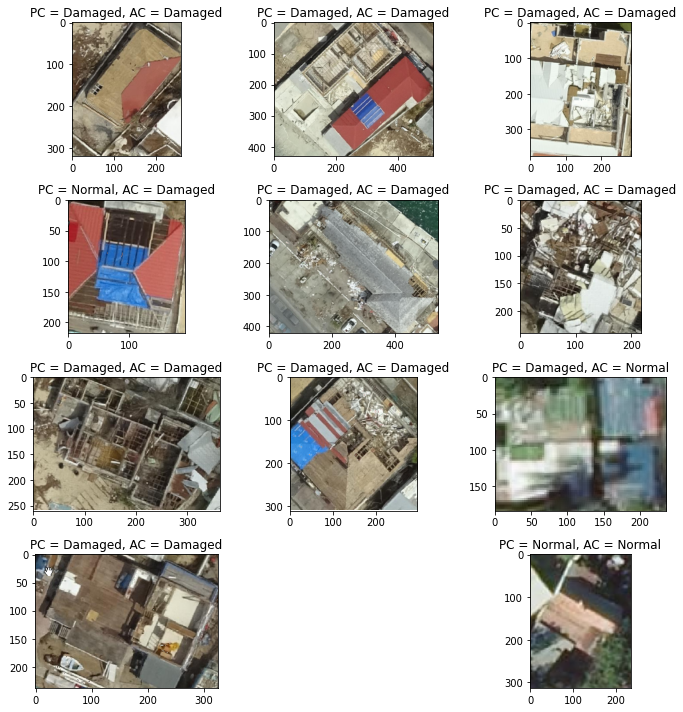

In [9]:
for i in range(0, 12):

    rand_num = random.randint(1, 50)
    rand_class = random.choice(['a', 'b'])

    if rand_num < 10:
        path = 'test_images/' + rand_class + '0%s.png' % rand_num
    else:
        path = 'test_images/' + rand_class + '%s.png' % rand_num
    if rand_class == "a":
        actual_class = "Normal"
    else:
        actual_class = "Damaged"

    predicted_class = prediction(path)[0]

    plt.subplot(4, 3, i+1)
    plt.rcParams["figure.figsize"]=10,10
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.tight_layout()
    plt.title(f'PC = {predicted_class}, AC = {actual_class}', fontsize=12)
    